# Student Loan Risk with Deep Learning

In [1]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [4]:
# Look for null values
null_summary = loans_df.isnull().sum()
print(null_summary)

payment_history           0
location_parameter        0
stem_degree_score         0
gpa_ranking               0
alumni_success            0
study_major_code          0
time_to_completion        0
finance_workshop_score    0
cohort_ranking            0
total_loan_score          0
financial_aid_score       0
credit_ranking            0
dtype: int64


In [5]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

In [6]:
# Check the shape of the Dataframe
loans_df.shape

(1599, 12)

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [7]:
# Define the target set y using the credit_ranking column
y = loans_df['credit_ranking']

# Display a sample of y
y[0:5].values

array([0, 0, 0, 1, 0], dtype=int64)

In [8]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop('credit_ranking', axis=1)

# Review the features DataFrame
X.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
# Check the shape of the Dataframe
X.shape

(1599, 11)

### Step 3: Split the features and target sets into training and testing datasets.


In [10]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [11]:
# Create a StandardScaler instance
X_scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [12]:
# Define the the number of inputs (features) to the model
input_nodes = len(X.columns)

# Review the number of features
input_nodes

11

In [13]:
# Define the number of hidden nodes for the first hidden layer
first_hidden_nodes = 6

# Define the number of hidden nodes for the second hidden layer
second_hidden_nodes = 3

# Define the number of neurons in the output layer
output_neurons = 1

In [14]:
# Create the Sequential model instance
nn_model = tf.keras.models.Sequential()

# Add the first hidden layer
nn_model.add(tf.keras.layers.Dense(first_hidden_nodes, activation="relu", input_dim=input_nodes))

# Add the second hidden layer
nn_model.add(tf.keras.layers.Dense(second_hidden_nodes, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(tf.keras.layers.Dense(output_neurons, activation="sigmoid"))

c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [16]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Fit the model using 50 epochs and the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100) # I chose 100 epochs because it will give better results and the computational add-on is not big
# The instructions in BCS state to use 50 or 100.  After I ran it with 50, I saw the the Accuracy keeps increasing; thus, I chose 100 epochs.

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5068 - loss: 0.7370
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 0.7016 
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.6697 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6532 - loss: 0.6624 
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6833 - loss: 0.6494 
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.6316 
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - loss: 0.6215 
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7098 - loss: 0.5996 
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6995 - loss: 0.5895 
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7399 - loss: 0.5456 
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7316 - loss: 0.5509 
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


<Axes: >

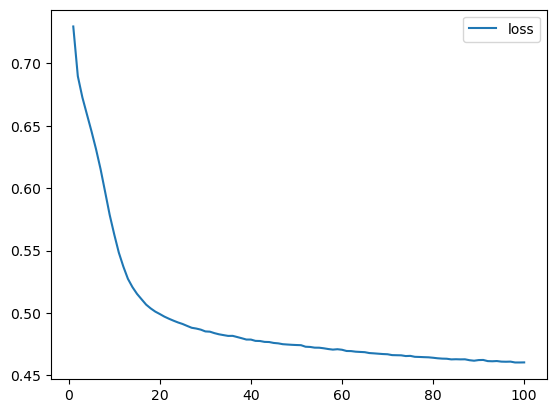

In [18]:
# Let's create and graph the DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# For better visualization; let's plot the loss
history_df.plot(y='loss')

<Axes: >

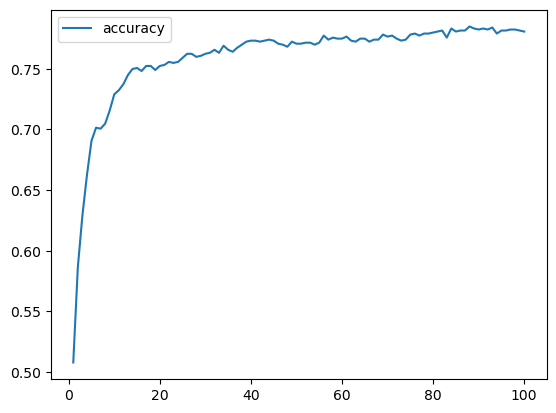

In [19]:
# For better visualization, let's plot the accuracy as well
history_df.plot(y='accuracy')

In [20]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Model Loss:      {model_loss:.2f}")
print(f'Model Accuracy:  {model_accuracy:.2f}')

13/13 - 0s - 14ms/step - accuracy: 0.7400 - loss: 0.5137
Model Loss:      0.51
Model Accuracy:  0.74


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [21]:
# Set the model's file path
file_path = Path('student_loans.keras')

# Export your model to a keras file
nn_model.save(file_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [22]:
# Set the model's file path
file_path = Path('student_loans.keras')

# Load the model to a new object
sl_imported = tf.keras.models.load_model(file_path)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [23]:
# Make predictions with the test data
predictions = sl_imported.predict(X_test_scaled, verbose=2)

# Display a sample of the predictions
predictions[0:5]

13/13 - 0s - 7ms/step


array([[0.44133475],
       [0.3479404 ],
       [0.8914629 ],
       [0.6825479 ],
       [0.9762293 ]], dtype=float32)

In [24]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(columns=["predictions"], data=predictions)
predictions_df["predictions"] = round(predictions_df["predictions"],0)
predictions_df

,predictions
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,1.0


### Step 4: Display a classification report with the y test data and predictions

In [25]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df["predictions"].values))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       188
           1       0.75      0.76      0.76       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [26]:
# What would this look like with a random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier model
# Let's choose n_estimators=128 and random_state =1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Let's fit the model to the traing data
rf_model.fit(X_train_scaled, y_train)

# Let's Validate the model by checking the model's accuracy and the score
print(f'Traing Data Score:   {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score:  {rf_model.score(X_test_scaled, y_test)}')

Traing Data Score:   1.0
Testing Data Score:  0.8175


In [27]:
# Let's Make predictions and product the classification report for the Random Forest model
predictions_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       188
           1       0.84      0.82      0.83       212

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [28]:
# Interesting; it appears that the Random Forest model produced more accurate results; thus, in the end, I would go with that model.
# However, for this exercise; let's move forward with the Neural Network Deep Learning model

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. To build a recommendation system for student loan options, I would collect the following data:**

     1.  Student Demographics: Age, location, name of school, and major. This data helps personalize recommendations based on regional loan availability and program-specific needs.
     2.  Academic Performance: GPA, standardized test scores, and degree type (STEM vs. non-STEM). Academic performance impacts loan approval likelihood and repayment terms.
     3.  Financial Information: Household income, existing debt, and financial aid eligibility. This data helps tailor recommendations based on affordability and repayment capacity.
     4.  Loan History: Previous borrowing records, repayment history, and credit ranking. These factors are critical in assessing risk and offering suitable loan options.
     5.  Preferences: Loan amount requested, desired repayment term, and interest rate preferences. Understanding preferences ensures recommendations align with the student's goals.

This data is relevant because it enables the recommendation system to balance financial responsibility with academic aspirations, offering personalized and practical loan options.


**2. I would use context-based filtering recommendation system. This method leverages both the student’s attributes (demographics, academic performance, financial data) and contextual factors such as loan terms and lender-specific requirements.**

Unlike collaborative filtering, which relies on user-to-user comparisons, or content-based filtering, which focuses on item-specific attributes, context-based filtering combines multiple dimensions. For example, it evaluates how a student's financial profile and academic program interact with lender-specific conditions to make personalized recommendations. This approach ensures that the recommendations are not only accurate but also highly relevant to the student’s unique situation.


**3. One real world challenge is Data Privacy and Security: Student loan approval requires sensitive personal and financial information, such as income, credit scores, and academic records. Ensuring the system complies with data protection regulations (e.g., GDPR, FERPA) is critical to maintaining user trust and avoiding legal repercussions.**

Another real world challenge is Fairness and Bias Mitigation: Loan approval must be free from biases that could disproportionately disadvantage certain groups (e.g., students from underprivileged backgrounds). Failing to address bias could lead to discriminatory practices, undermining the credibility of the system and potentially violating anti-discrimination laws.

Both challenges are of concern because they directly impact the system's usability, compliance, and ethical standing, which are essential for long-term success and stakeholder confidence.

